# 'Adventure' Playlist - Music Recommendations For Variety And The Long Tail

# Notebook 05

&nbsp;

**By: [Jonathan Yeung](https://github.com/jonathan-yeung)**

In this notebook, I intend to build the 'Adventure' playlist using content-based recommendation with the novelty-relevance approach, which will be defined below. The model displayed below would be a prototype that captures the core feature - finding "relevant but novel" sound for users. I will also pick a user with his listening history as a case study for the recommendation approach, and use the previous clustering result to evaluate how well the recommendations suggest music tracks different from the user's listening history.

---

# Table of Contents

1. [**Data Dictionary for the 7 Audio Features**](#DataDictAF)<br>

2. [**Imports**](#Imports)<br>

3. [**Preprocessed Data**](#Preprocessed-Data)<br>

4. [**Case Study: User A**](#UserA)<br>
  4.1 [Taste Profile of User A's Listening History](#ATaste)<br>
  
5. [**The Novelty-Relevance Approach**](#NR)<br>
  5.1 [Relevance](#Relevance)<br>
  5.2 [Novelty](#Novelty)<br>
  5.3 [Novelty-Relevance](#Novelty-Relevance)<br>

6. [**Content-based Recommendations: The Novelty-Relevance Approach with 7 Audio Features**](#NRRec)<br>
  6.1 [Taste Profile of Novelty-Relevance Recommendations for User A](#TasteNRRec)<br>

7. [**Notebook Summary**](#Notebook-Summary)<br>

8. [**Potential Further Steps**](#Potential-Further-Steps)<br>

---

# Data Dictionary for the 7 Audio Features <a name="DataDictAF"></a>

| Column Name | Data Type | Description |
|:--|:--|:--|
| `danceability` | float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| `energy` | float | A perceptual measure of intensity and activity, measured from 0.0 to 1.0. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| `speechiness` | float | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| `instrumentalness` | float | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| `liveness` | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| `valence` | float | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| `tempo` | float | The overall estimated tempo of a track in beats per minute (BPM) |

---

# Imports

In [1]:
# misc
import os

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# distances
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_distances

# Preprocessed Data

In [2]:
file_path = '/Users/jonwfyeung/Downloads/adventure_playlist/'

In [3]:
check_file_track_vec = os.path.isfile(file_path + 'data/df_track_vec.csv')
check_file_user = os.path.isfile(file_path + 'data/User_Listening_History.csv')
check_file_user_track = os.path.isfile(file_path + 'data/df_user_track.csv')
check_file_user_a = os.path.isfile(file_path + 'data/df_user_a.csv')
check_file_track_label = os.path.isfile(file_path + 'data/df_track_label.csv')

print(check_file_track_vec)
print(check_file_user)
print(check_file_user_track)
print(check_file_user_a)
print(check_file_track_label)

True
True
True
True
True


In [4]:
df_track_vec = pd.read_csv(file_path + 'data/df_track_vec.csv')
df_track_vec.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,year,duration_ms,danceability,energy,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",2004,222200,0.355,0.918,...,0,0,0,0,0,0,0,0,0,0
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",2006,258613,0.409,0.892,...,0,0,0,0,0,0,0,0,0,0
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",1991,218920,0.508,0.826,...,0,0,0,0,0,0,0,0,0,0
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",2004,237026,0.279,0.664,...,0,0,0,0,0,0,0,0,0,0
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",2008,238640,0.515,0.430,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_user = pd.read_csv(file_path + 'data/User_Listening_History.csv')
df_user.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [6]:
df_track_label = pd.read_csv(file_path + 'data/df_track_label.csv')
df_track_label.head()

,track_id,cluster
0,TRIOREW128F424EAF0,1
1,TRRIVDJ128F429B0E8,2
2,TROUVHL128F426C441,2
3,TRUEIND128F93038C4,1
4,TRLNZBD128F935E4D8,5


---

# Case Study: User A <a name="UserA"></a>

picking the user with `user_id` = 'dad2c676285453c5ae935d7a386ae88c4106c55c' as User A

User A seems to have a very biased listening history. The playcounts are highly concentrated on one track with a `tag` of 'classical' while 3 playcounts are on two other tracks with a very different and diverse set of `tags`.

In [48]:
df_user_a_raw = df_user[df_user['user_id'] == 'dad2c676285453c5ae935d7a386ae88c4106c55c'].copy()
df_user_a_raw

,track_id,user_id,playcount
5713611,TRDGUAJ128F92D541D,dad2c676285453c5ae935d7a386ae88c4106c55c,2
5713612,TRXGJBN128F92D3FCB,dad2c676285453c5ae935d7a386ae88c4106c55c,1
5713613,TRRFUFW128F145AA03,dad2c676285453c5ae935d7a386ae88c4106c55c,709


In [49]:
df_user_a = df_user_a_raw.merge(df_track_vec,
                                how='inner',
                                on='track_id')
df_user_a

,track_id,user_id,playcount,name,artist,spotify_preview_url,spotify_id,tags,year,duration_ms,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
0,TRDGUAJ128F92D541D,dad2c676285453c5ae935d7a386ae88c4106c55c,2,Rammstein,Rammstein,https://p.scdn.co/mp3-preview/7896bd4d0aa056c6...,176mKgRpX9i9v81eNcsxzf,"metal, hard_rock, heavy_metal, industrial, german",1995,265040,...,0,0,0,0,0,0,0,0,0,0
1,TRXGJBN128F92D3FCB,dad2c676285453c5ae935d7a386ae88c4106c55c,1,My Boyfriend's Back,The Raveonettes,https://p.scdn.co/mp3-preview/6e9f326786d364b6...,0hJ5wRjmIaFHRsGemwcGCG,"indie, female_vocalists, indie_rock, oldies, c...",2005,159293,...,0,0,0,0,0,0,0,0,0,0
2,TRRFUFW128F145AA03,dad2c676285453c5ae935d7a386ae88c4106c55c,709,The Lamb,John Tavener,https://p.scdn.co/mp3-preview/7523794e8f9e52a4...,06xxPneBvowsH0oa95saVo,classical,2014,234103,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# df_user_a.to_csv(file_path + '/data/df_user_a.csv', index=False)

In [7]:
# # uncomment this cell and run df_user_a from here
# df_user_a = pd.read_csv(file_path + '/data/df_user_a.csv')
# df_user_a

,track_id,user_id,playcount,name,artist,spotify_preview_url,spotify_id,tags,year,duration_ms,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
0,TRDGUAJ128F92D541D,dad2c676285453c5ae935d7a386ae88c4106c55c,2,Rammstein,Rammstein,https://p.scdn.co/mp3-preview/7896bd4d0aa056c6...,176mKgRpX9i9v81eNcsxzf,"metal, hard_rock, heavy_metal, industrial, german",1995,265040,...,0,0,0,0,0,0,0,0,0,0
1,TRXGJBN128F92D3FCB,dad2c676285453c5ae935d7a386ae88c4106c55c,1,My Boyfriend's Back,The Raveonettes,https://p.scdn.co/mp3-preview/6e9f326786d364b6...,0hJ5wRjmIaFHRsGemwcGCG,"indie, female_vocalists, indie_rock, oldies, c...",2005,159293,...,0,0,0,0,0,0,0,0,0,0
2,TRRFUFW128F145AA03,dad2c676285453c5ae935d7a386ae88c4106c55c,709,The Lamb,John Tavener,https://p.scdn.co/mp3-preview/7523794e8f9e52a4...,06xxPneBvowsH0oa95saVo,classical,2014,234103,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print("Spotify Preview URLs for User A's listening history:\n")
for i in range(df_user_a.shape[0]):
    print(f'No.{i}: '+ df_user_a.iloc[i]['spotify_preview_url']+'\n')

Spotify Preview URLs for User A's listening history:

No.0: https://p.scdn.co/mp3-preview/7896bd4d0aa056c664dbebba961af2a138bfa83c?cid=774b29d4f13844c495f206cafdad9c86

No.1: https://p.scdn.co/mp3-preview/6e9f326786d364b633972f1798e91d33510c03cf?cid=774b29d4f13844c495f206cafdad9c86

No.2: https://p.scdn.co/mp3-preview/7523794e8f9e52a4e1c277efae34e828f0b159b0?cid=774b29d4f13844c495f206cafdad9c86



## Taste Profile of User A's Listening History <a name="ATaste"></a>

In [9]:
df_user_a_label = df_user_a.copy()

user_a_label_list = []

for i in range(df_user_a_label.shape[0]):
    user_a_label_list.append(df_track_label[df_track_label['track_id'] == df_user_a_label.iloc[i]['track_id']]['cluster'].values[0])
    
df_user_a_label['cluster'] = user_a_label_list
df_user_a_label

,track_id,user_id,playcount,name,artist,spotify_preview_url,spotify_id,tags,year,duration_ms,...,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop,cluster
0,TRDGUAJ128F92D541D,dad2c676285453c5ae935d7a386ae88c4106c55c,2,Rammstein,Rammstein,https://p.scdn.co/mp3-preview/7896bd4d0aa056c6...,176mKgRpX9i9v81eNcsxzf,"metal, hard_rock, heavy_metal, industrial, german",1995,265040,...,0,0,0,0,0,0,0,0,0,3
1,TRXGJBN128F92D3FCB,dad2c676285453c5ae935d7a386ae88c4106c55c,1,My Boyfriend's Back,The Raveonettes,https://p.scdn.co/mp3-preview/6e9f326786d364b6...,0hJ5wRjmIaFHRsGemwcGCG,"indie, female_vocalists, indie_rock, oldies, c...",2005,159293,...,0,0,0,0,0,0,0,0,0,2
2,TRRFUFW128F145AA03,dad2c676285453c5ae935d7a386ae88c4106c55c,709,The Lamb,John Tavener,https://p.scdn.co/mp3-preview/7523794e8f9e52a4...,06xxPneBvowsH0oa95saVo,classical,2014,234103,...,0,0,0,0,0,0,0,0,0,4


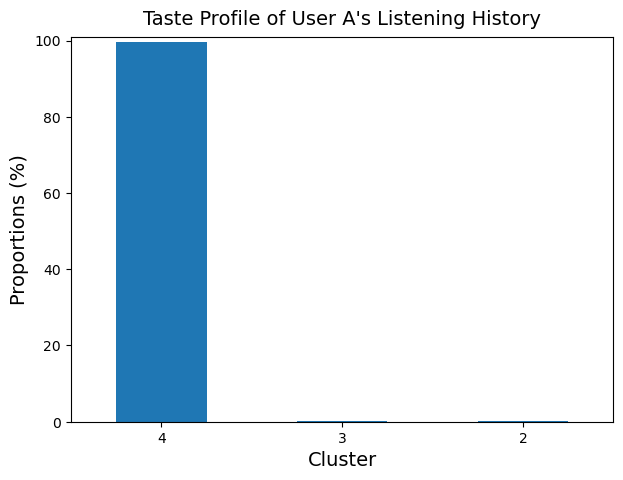

In [16]:
plt.figure(figsize=(7,5))
(100*df_user_a_label.groupby('cluster')['playcount'].sum()/df_user_a_label['playcount'].sum()).round(4)\
                                                .sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Proportions (%)', fontsize=14)
plt.ylim(0.0, 101.0)
plt.title("Taste Profile of User A's Listening History", fontsize=14, y=1.01)
plt.show()

As shown in the above graph, the taste profile of User A's listening history is a very biased one. 99.58% of the playcounts were concentrated on Cluster 4, as 99.58% of the playcounts were on one particular track.

If he wants to find new sounds but does not have a good idea on how to find them, could our recommender system help him?

---

# The Novelty-Relevance Approach <a name="NR"></a>

Instead of finding similar tracks, the approach attempts to find "related but novel" tracks for users, hence the name "Novelty-Relevance". The metric for "Relevance", "Novelty" and "Relevance-Novelty" are defined as follows, and will be computed in the recommendation function below.

## Relevance

We use _cosine-similarity_ on the _count-vectorized_ tags of tracks to measure the relevance between a track in the database and a track in the user's listening history. The more tags shared between the two tracks, the more relevant the two tracks are.

Relevance score, for the $i$-th track in the database and $j$-th track in the user's listening history,

$$ \text{relevance}_i = \text{average of cosine_similarity(database_tags}_i\text{, user_tags}_j \text{) across all the tracks in the user's listening history} $$

Note that the relevance score is always between $0$ and $1$.

## Novelty

We use _cosine-distance_ on the audio features of tracks to measure the novelty of a track in the database from a track in the user's listening history. Here we use 7 audio features `danceability`, `energy`, `speechiness`, `instrumentalness`, `liveness`, `valence` and `tempo_scaled`. The more differently the tracks sound, the higher the cosine-distance on the audio features is, and hence the more difference in the sound of the track the user may find. We assume that the track with a higher novelty score will give users a more 'novel' sound, which they may want to discover and adventure into the niche music market.

Novelty score, for the $i$-th track in the database and $j$-th track in the user's listening history,

$$ \text{novelty}_i = \text{average of }\frac{1}{2} \ast \text{cosine_distance(database_audio_features}_i \text{, user_audio_features}_j \text{) across all the tracks in the user's listening history} $$

Note that the novelty score is always between $0$ and $1$.

## Novelty-Relevance

Finally, we combine the two scores using a linear combination of both to create a new metric called Novelty-Relevance score (or nr-score) as in the following equation.

Novelty-Relevance score, for the _i_-th track in the database,

$$\text{nr-score}_i = \alpha \ast \text{novelty}_i + (1-\alpha) \ast \text{relevance}_i $$

where $0 \le \alpha \le 1$ ($\alpha$ is set at 0.5 by default)

Note that the nr-score is always between $0$ and $1$.

We intend to capture tracks that are **"related but novel at the same time"**. The nr-score is created to capture the quality for users who want to adventure into new sounds. The higher the novelty-relevance score, the better the tracks in terms of the above quality.

To enhance the experience of 'Adventure' in the playlist, **the weighting $\alpha$ of novelty against relevance will be customizable by the user** so that the user can control how far he/she wants to explore away from his/her cohort in the listening history.

---

# Content-based Recommendations: The Novelty-Relevance Approach with 7 Audio Features <a name="NRRec"></a>

**Recommendation Function: nr_rec( )**

The recommendation function nr_rec( ) first computes the "relevance score" and "novelty score", then combines the two scores into "novelty-relevance score" and stores it in the `nr_score` column. It then ranks all tracks in the database by `nr_score` column and outputs the top 10 tracks.

The algorithm requires two pre-processed dataframes:

- df_track_vec - a pre-processed dataframe containing all tracks in the database with all basic information, audio features, and count-vectorized columns of tags of the tracks
- df_user - a pre-processed dataframe containing all tracks in the user's listening history with all basic information, audio features and count-vectorized columns of tags of the tracks

We have to make sure that the two dataframes have the same columns for audio features and tags so as to make valid comparison for "relevance score" and "novelty score".

Users can input a value for $\alpha$ into the recommendation function to customize the weighting of novelty against relevance for their playlist.

<img src="https://drive.google.com/uc?export=view&id=1fOTOFEBxF_KNmm7s1hi_lQccpBlU4Vr_" width=400/>

In [20]:
def nr_rec(df_track_vec, df_user, alpha=0.5):

    '''
    makes a playlist of top 10 recommendations using content-based novelty-relevance approach with the 7 audio 
    features 'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo_scaled'
    
    Inputs
    ---------------
    df_track_vec: a pre-processed dataframe containing all tracks in the database with all basic information,
                  audio features, and count-vectorized columns of tags of the tracks
    df_user: a pre-processed dataframe containing all tracks in the user's listening history with all basic
             information, audio features and count-vectorized columns of tags of the tracks
    
    Outputs
    ---------------
    returns a dataframe listing the top 10 recommendations with track_id, track name, artist name, spotify preview url,
    year, tags, and the novelty-relevance scores
    returns spotify preview urls for the top 10 recommendations individually
    
    '''
    
    assert isinstance(alpha, (float, int)), 'alpha must be a number'
    assert (alpha >= 0.0) & (alpha <= 1.0), 'alpha must be between 0.0 and 1.0'
    
    # creating a dataframe of all tracks in the database for comparing Novelty-Relevance score
    df_nr_rec = df_track_vec[['track_id', 'name', 'artist', 'spotify_preview_url', 'year', 'tags']].copy()

    # Relevance score
    df_tag_track = df_track_vec.iloc[:,21:]
    df_tag_user = df_user.iloc[:,23:]
    relevance_mat = pairwise_distances(df_tag_track, df_tag_user, metric='cosine')
    avg_relevance_mat = relevance_mat.mean(axis=1)
    df_nr_rec['relevance'] = avg_relevance_mat

    # Novelty score
    attribute_list = ['danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo_scaled']

    df_af_track = df_track_vec[attribute_list]
    df_af_user = df_user[attribute_list]
    novelty_mat = cosine_distances(df_af_track, df_af_user) / 2
    avg_novelty_mat = novelty_mat.mean(axis=1)
    df_nr_rec['novelty'] = avg_novelty_mat

    # Novelty-Relevance score
    df_nr_rec['nr_score'] = alpha * df_nr_rec['novelty'] + (1-alpha) * df_nr_rec['relevance']

    # Playlist of top 10 recommendations by Novelty-Relevance score
    df_nr_rec_top10 = df_nr_rec.sort_values(by=['nr_score'], ascending=False).reset_index(drop=True)[:10]

    # displaying the results
    print("The 'Adventure' Playlist")
    print("==========================")
    print(f"The top 10 novelty-relevance recommendations with weighting of 'novelty' = {alpha}:\n")
    display(df_nr_rec_top10)
    print("\n \nSpotify Preview URLs for the top 10 recommendations:\n")
    for i in range(10):
        print(f"No.{i+1}: "+df_nr_rec_top10.loc[i]['spotify_preview_url']+"\n")
    return df_nr_rec_top10

In [21]:
df_nr_rec_top10 = nr_rec(df_track_vec, df_user_a, alpha=0.5)

The 'Adventure' Playlist
The top 10 novelty-relevance recommendations with weighting of 'novelty' = 0.5:



,track_id,name,artist,spotify_preview_url,year,tags,relevance,novelty,nr_score
0,TRWRQGH12903CD60DA,Song for Someone,U2,https://p.scdn.co/mp3-preview/418afb77bb7f92c7...,2014,"rock, chillout, male_vocalists",1.000000,0.500000,0.750000
1,TRFUMNQ128F933906A,240 Years Before Your Time,The Black Keys,https://p.scdn.co/mp3-preview/625e03044214d111...,2002,"rock, blues, blues_rock",1.000000,0.380851,0.690425
2,TRDZLJH128F428CB73,Cheerleader Corpses,Pig Destroyer,https://p.scdn.co/mp3-preview/4949d74ea5f78abc...,2001,grindcore,1.000000,0.325539,0.662770
3,TRCTFEM12903CE53CF,Sunburn,Muse,https://p.scdn.co/mp3-preview/dc7bd2693228ea52...,1999,"rock, alternative, indie, alternative_rock, pr...",0.947295,0.329278,0.638287
4,TROUCKC128F92F9AA1,I Remember Now,Queensrÿche,https://p.scdn.co/mp3-preview/45176c474e91bc25...,1988,progressive_metal,1.000000,0.275839,0.637919
5,TRIWWIM128F9332302,Getting Through,Helios,https://p.scdn.co/mp3-preview/7755c136eecedefd...,2004,"ambient, idm, dark_ambient, noise",1.000000,0.270669,0.635334
6,TRCYKDU128F92F1856,Xylem,Aes Dana,https://p.scdn.co/mp3-preview/f51388f3ee9c9c00...,2011,"electronic, ambient, dark_ambient",1.000000,0.266396,0.633198
7,TRLLFMV128F92CC04B,Voices Of Old People,Simon & Garfunkel,https://p.scdn.co/mp3-preview/ce00852325f368c1...,2001,"folk, singer_songwriter, 60s",1.000000,0.257934,0.628967
8,TRDKHAE128F428854D,Kim & Cookie (Interlude),OutKast,https://p.scdn.co/mp3-preview/570d8c082a9eec0a...,2000,"soul, rap, hip_hop",1.000000,0.256885,0.628443
9,TRQKNOS128F9310736,Local Boy Makes God,Amusement Parks On Fire,https://p.scdn.co/mp3-preview/ad619c4074058aac...,2005,noise,1.000000,0.256199,0.628100



 
Spotify Preview URLs for the top 10 recommendations:

No.1: https://p.scdn.co/mp3-preview/418afb77bb7f92c730ffdfbedc84398abd62be03?cid=774b29d4f13844c495f206cafdad9c86

No.2: https://p.scdn.co/mp3-preview/625e03044214d11138a9186330a16cda96cc4e21?cid=774b29d4f13844c495f206cafdad9c86

No.3: https://p.scdn.co/mp3-preview/4949d74ea5f78abcfa08b0bdccdd8a81e9f0ec6b?cid=774b29d4f13844c495f206cafdad9c86

No.4: https://p.scdn.co/mp3-preview/dc7bd2693228ea521083c25f1fc6910201f87561?cid=774b29d4f13844c495f206cafdad9c86

No.5: https://p.scdn.co/mp3-preview/45176c474e91bc2599f602ce3a1e03507595a0d5?cid=774b29d4f13844c495f206cafdad9c86

No.6: https://p.scdn.co/mp3-preview/7755c136eecedefd2effb6674dad2dec4f2469b1?cid=774b29d4f13844c495f206cafdad9c86

No.7: https://p.scdn.co/mp3-preview/f51388f3ee9c9c00ed1f8311c660dd3f9f7fd6e7?cid=774b29d4f13844c495f206cafdad9c86

No.8: https://p.scdn.co/mp3-preview/ce00852325f368c143434d47c274ace9f9d50a70?cid=774b29d4f13844c495f206cafdad9c86

No.9: https://p.scdn.co

## Taste Profile of Novelty-Relevance Recommendations for User A <a name="TasteNRRec"></a>

In [22]:
label_list = []

for i in range(df_nr_rec_top10.shape[0]):
    label_list.append(df_track_label[df_track_label['track_id'] == df_nr_rec_top10.iloc[i]['track_id']]['cluster'].values[0])
    
df_nr_rec_top10['cluster'] = label_list
df_nr_rec_top10

,track_id,name,artist,spotify_preview_url,year,tags,relevance,novelty,nr_score,cluster
0,TRWRQGH12903CD60DA,Song for Someone,U2,https://p.scdn.co/mp3-preview/418afb77bb7f92c7...,2014,"rock, chillout, male_vocalists",1.000000,0.500000,0.750000,5
1,TRFUMNQ128F933906A,240 Years Before Your Time,The Black Keys,https://p.scdn.co/mp3-preview/625e03044214d111...,2002,"rock, blues, blues_rock",1.000000,0.380851,0.690425,5
2,TRDZLJH128F428CB73,Cheerleader Corpses,Pig Destroyer,https://p.scdn.co/mp3-preview/4949d74ea5f78abc...,2001,grindcore,1.000000,0.325539,0.662770,1
3,TRCTFEM12903CE53CF,Sunburn,Muse,https://p.scdn.co/mp3-preview/dc7bd2693228ea52...,1999,"rock, alternative, indie, alternative_rock, pr...",0.947295,0.329278,0.638287,5
4,TROUCKC128F92F9AA1,I Remember Now,Queensrÿche,https://p.scdn.co/mp3-preview/45176c474e91bc25...,1988,progressive_metal,1.000000,0.275839,0.637919,5
5,TRIWWIM128F9332302,Getting Through,Helios,https://p.scdn.co/mp3-preview/7755c136eecedefd...,2004,"ambient, idm, dark_ambient, noise",1.000000,0.270669,0.635334,0
6,TRCYKDU128F92F1856,Xylem,Aes Dana,https://p.scdn.co/mp3-preview/f51388f3ee9c9c00...,2011,"electronic, ambient, dark_ambient",1.000000,0.266396,0.633198,4
7,TRLLFMV128F92CC04B,Voices Of Old People,Simon & Garfunkel,https://p.scdn.co/mp3-preview/ce00852325f368c1...,2001,"folk, singer_songwriter, 60s",1.000000,0.257934,0.628967,5
8,TRDKHAE128F428854D,Kim & Cookie (Interlude),OutKast,https://p.scdn.co/mp3-preview/570d8c082a9eec0a...,2000,"soul, rap, hip_hop",1.000000,0.256885,0.628443,5
9,TRQKNOS128F9310736,Local Boy Makes God,Amusement Parks On Fire,https://p.scdn.co/mp3-preview/ad619c4074058aac...,2005,noise,1.000000,0.256199,0.628100,4


In [24]:
df_nr_rec_top10['cluster'].value_counts(normalize=True, ascending=False)*100

cluster
5    60.0
4    20.0
1    10.0
0    10.0
Name: proportion, dtype: float64

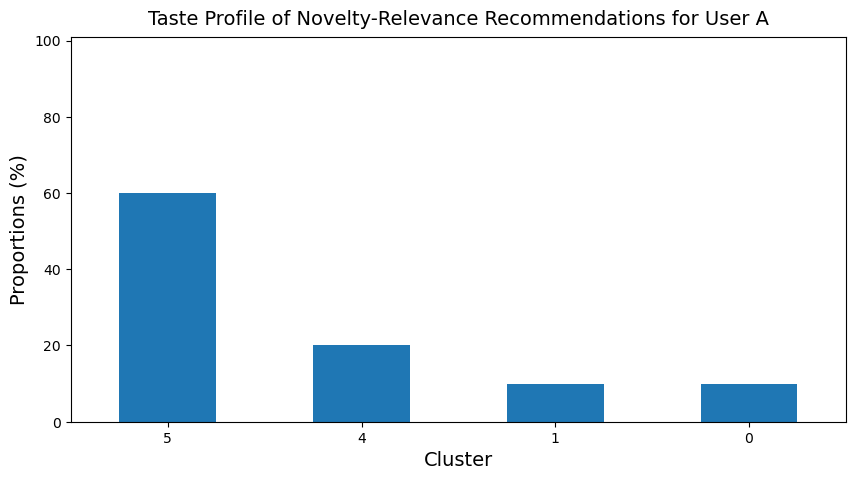

In [27]:
plt.figure(figsize=(10,5))
(df_nr_rec_top10['cluster'].value_counts(normalize=True, ascending=False)*100).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Proportions (%)', fontsize=14)
plt.ylim(0.0, 101.0)
plt.title("Taste Profile of Novelty-Relevance Recommendations for User A", fontsize=14, y=1.01)
plt.show()

Compared to User A's original taste profile, the Novelty-Relevance Recommendations give User A much more exposure to other clusters - Cluster 5, 1 and 0, while still gives User A some exposure to the dominant cluster in his listening history - Cluster 4.

---

# Notebook Summary

We have a walk-through of the prototype 'Adventure' playlist above, demonstrating:

- the flow of how the algorithm computes the novelty-relevance scores for tracks from the two preprocessed dataframes and makes corresponding recommendations

- the actual recommendation function used

- the portal of alpha that allows users to control and adjust for their own playlists

There are some points to be reiterated:

- the algorithm uses only audio features and tags to make recommendations, which attempts to address the cold-start problem mentioned before and deliberately uses attributes that do not require track records or equivalent from the artists in the long-tail market.

- the algorithm might give more chance of exposure for the artists in the long-tail market, but is still user-centric; it is still dependent on the users' interests and finds tracks based on their preferences.

- the core feature of the recommendation approach is to find tracks that are "relevant but novel" for users, which is demonstrated in the case study and cluster distributions above. We could always modify the model using more advanced methods and more data based on the core feature.

---

# Potential Further Steps

There are several directions we could take to improve the recommender system:

- gather more user data that could measure user engagement rate (e.g. "like", "save", "share", the segment of the track a user played, exposure-to-play conversion rate, play-to-share conversion rate, etc.)

This would be an important component that allows the recommender system to find out the latent representation or embeddings of users' interests and use them as a part of loss function to optimize the recommendations (assuming that we use more advanced machine learning models such as Neural Networks, Variational AutoEncoders, etc.)

- more granularity on the track data and attributes, e.g. audio analysis of the tracks by segment, which is available via Spotify API

- use of categorical variables such as `key`, `mode` and `time_signature` for clustering and computing "novelty"

- add a time factor (e.g. `year`) as a component of "novelty"

- gather data of artists' collaborations and use that to plot their connections on a network graph. The network graph could then be used to find "relevance" between artists and hence between tracks.